In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['8th Grade','2011','8th Grade','2011'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,8th Grade,2011,38.0,-1.7,-3 to -0.5,2,red,38.0,-1.0,-1.8 to -0.2,12,red,"LOCKE, A CHTR",400011,4730,Charter,8th Grade,2011,92.3,100.0,96.2,7.7,35.9,21.8,84.6,64.1,74.4,7.7,0.0,3.8,0,0,0,39,39
1,ASPIRA CHTR - HAUGAN,400017,O'Hare,8th Grade,2011,157.5,-0.9,-1.7 to -0.1,21,red,157.5,-0.7,-1.1 to -0.2,28,red,ASPIRA CHTR - HAUGAN,400017,3500,Charter,8th Grade,2011,68.9,74.0,71.5,0.5,23.1,11.8,68.4,51.0,59.7,30.1,25.0,27.6,1,1,1,209,208
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,8th Grade,2011,44.2,-0.2,-1.4 to 1,43,yellow,44.2,-0.2,-1 to 0.6,43,yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,3990,Charter,8th Grade,2011,85.4,77.1,81.3,2.1,16.7,9.4,83.3,60.4,71.9,14.6,22.9,18.8,0,0,0,48,48


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(416, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     25.08
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           8.16e-07
Time:                        11:10:56   Log-Likelihood:                -1582.8
No. Observations:                 415   AIC:                             3170.
Df Residuals:                     413   BIC:                             3178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     81.2826      0.540    150.573      0.000        80.221    82.344
x              2.7205      0.543      5.008      0.000         1.653     3.788
==============================================================================
Omnibus:                       89.118   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.260
Skew:                          -0.973   Prob(JB):                     3.77e-61
Kurtosis:                       6.508   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

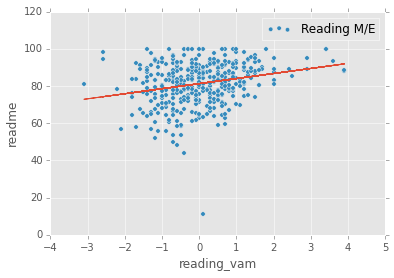

In [6]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     11.82
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           0.000644
Time:                        11:12:04   Log-Likelihood:                -1484.3
No. Observations:                 415   AIC:                             2973.
Df Residuals:                     413   BIC:                             2981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.6728      0.426     13.324      0.000         4.836     6.510
x              1.4732      0.428      3.439      0.001         0.631     2.315
==============================================================================
Omnibus:                      331.971   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5214.887
Skew:                           3.409   Prob(JB):                         0.00
Kurtosis:                      18.972   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

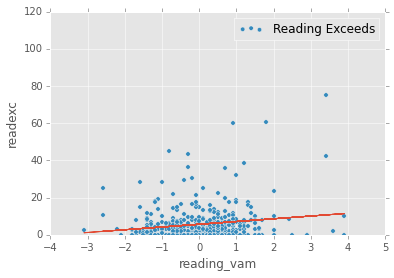

In [8]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading Exceeds")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.978
Date:                Mon, 03 Aug 2015   Prob (F-statistic):             0.0149
Time:                        11:12:20   Log-Likelihood:                -1555.4
No. Observations:                 415   AIC:                             3115.
Df Residuals:                     413   BIC:                             3123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     75.6134      0.505    149.638      0.000        74.620    76.607
x              1.2432      0.508      2.445      0.015         0.244     2.243
==============================================================================
Omnibus:                      142.932   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.048
Skew:                          -1.437   Prob(JB):                    2.57e-142
Kurtosis:                       8.426   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

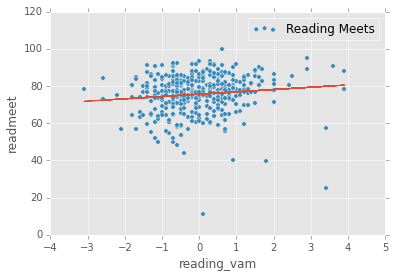

In [9]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading Meets")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     23.26
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           1.99e-06
Time:                        11:13:08   Log-Likelihood:                -1581.3
No. Observations:                 415   AIC:                             3167.
Df Residuals:                     413   BIC:                             3175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.4967      0.538     34.386      0.000        17.439    19.554
x             -2.6106      0.541     -4.823      0.000        -3.675    -1.547
==============================================================================
Omnibus:                       92.588   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.215
Skew:                           1.004   Prob(JB):                     7.85e-65
Kurtosis:                       6.611   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

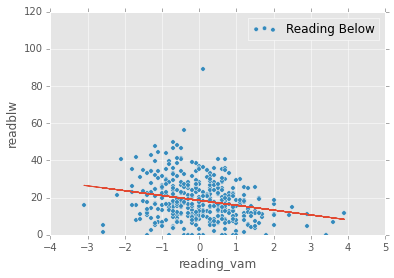

In [10]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     12.14
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           0.000547
Time:                        11:13:31   Log-Likelihood:                -394.34
No. Observations:                 415   AIC:                             792.7
Df Residuals:                     413   BIC:                             800.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2216      0.031      7.197      0.000         0.161     0.282
x             -0.1080      0.031     -3.484      0.001        -0.169    -0.047
==============================================================================
Omnibus:                      272.157   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1854.241
Skew:                           2.943   Prob(JB):                         0.00
Kurtosis:                      11.520   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

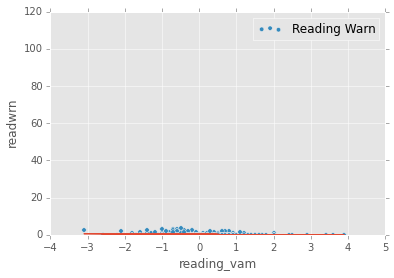

In [11]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading Warn")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     12.16
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           0.000541
Time:                        11:11:32   Log-Likelihood:                -1624.9
No. Observations:                 416   AIC:                             3254.
Df Residuals:                     414   BIC:                             3262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     81.7001      0.591    138.198      0.000        80.538    82.862
x              1.9786      0.567      3.487      0.001         0.863     3.094
==============================================================================
Omnibus:                       92.995   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.959
Skew:                          -1.057   Prob(JB):                     9.66e-57
Kurtosis:                       6.226   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

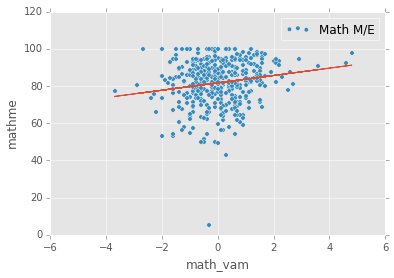

In [7]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math M/E")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     14.88
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           0.000133
Time:                        11:13:55   Log-Likelihood:                -1781.5
No. Observations:                 416   AIC:                             3567.
Df Residuals:                     414   BIC:                             3575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.0603      0.861     26.771      0.000        21.367    24.754
x              3.1894      0.827      3.857      0.000         1.564     4.815
==============================================================================
Omnibus:                      124.126   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.993
Skew:                           1.493   Prob(JB):                     4.37e-66
Kurtosis:                       5.907   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

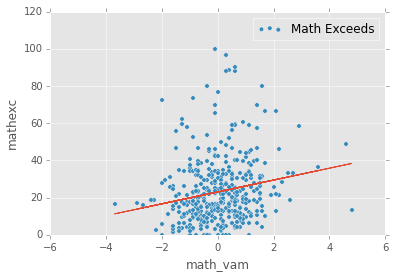

In [12]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.879
Date:                Mon, 03 Aug 2015   Prob (F-statistic):             0.0496
Time:                        11:14:42   Log-Likelihood:                -1659.3
No. Observations:                 416   AIC:                             3323.
Df Residuals:                     414   BIC:                             3331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     58.6392      0.642     91.313      0.000        57.377    59.901
x             -1.2141      0.616     -1.970      0.050        -2.426    -0.002
==============================================================================
Omnibus:                      106.123   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.048
Skew:                          -1.216   Prob(JB):                     1.71e-63
Kurtosis:                       6.281   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

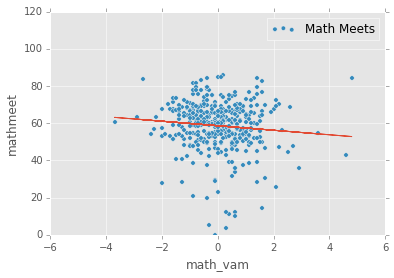

In [14]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     12.44
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           0.000468
Time:                        11:15:02   Log-Likelihood:                -1605.6
No. Observations:                 416   AIC:                             3215.
Df Residuals:                     414   BIC:                             3223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     17.7157      0.564     31.385      0.000        16.606    18.825
x             -1.9108      0.542     -3.526      0.000        -2.976    -0.846
==============================================================================
Omnibus:                       67.332   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.011
Skew:                           0.893   Prob(JB):                     2.16e-29
Kurtosis:                       5.104   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

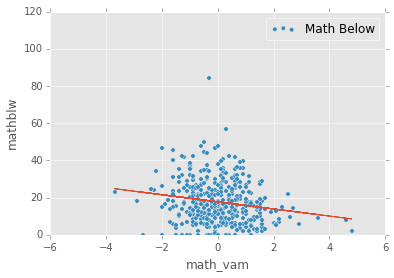

In [15]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math Below")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.235
Date:                Mon, 03 Aug 2015   Prob (F-statistic):              0.267
Time:                        11:15:20   Log-Likelihood:                -699.23
No. Observations:                 416   AIC:                             1402.
Df Residuals:                     414   BIC:                             1411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5885      0.064      9.213      0.000         0.463     0.714
x             -0.0682      0.061     -1.111      0.267        -0.189     0.052
==============================================================================
Omnibus:                      341.020   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6083.417
Skew:                           3.477   Prob(JB):                         0.00
Kurtosis:                      20.396   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

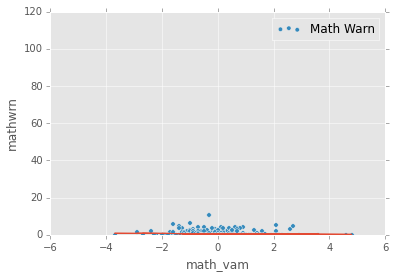

In [16]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()